# Basic flows

In [1]:
from prefect import flow

In [2]:
@flow
def my_favorite_function():
    print("This function doesn't do much")
    return 42

In [6]:
state = my_favorite_function()

09:04:29.110 | INFO    | prefect.engine - Created flow run 'encouraging-tanuki' for flow 'my-favorite-function'
09:04:29.111 | INFO    | Flow run 'encouraging-tanuki' - Using task runner 'ConcurrentTaskRunner'
09:04:29.121 | WARNING | Flow run 'encouraging-tanuki' - No default storage is configured on the server. Results from this flow run will be stored in a temporary directory in its runtime environment.
09:04:29.158 | INFO    | Flow run 'encouraging-tanuki' - Finished in state Completed()


This function doesn't do much


In [7]:
state

Completed(message=None, type=COMPLETED, result=42, flow_run_id=18a88a16-65d7-42b8-9bd9-330e12c19c83)

## Note

- @flow decorator
- flow runs via function call
- flow states are separate Python objects

In [8]:
import requests

In [10]:
@flow
def call_api(api_url):
    return requests.get(api_url).json()

In [11]:
state = call_api("http://time.jsontest.com/")

09:10:04.087 | INFO    | prefect.engine - Created flow run 'tidy-hyena' for flow 'call-api'
09:10:04.088 | INFO    | Flow run 'tidy-hyena' - Using task runner 'ConcurrentTaskRunner'
09:10:04.098 | WARNING | Flow run 'tidy-hyena' - No default storage is configured on the server. Results from this flow run will be stored in a temporary directory in its runtime environment.
09:10:04.409 | INFO    | Flow run 'tidy-hyena' - Finished in state Completed()


In [12]:
state

Completed(message=None, type=COMPLETED, result={'date': '05-14-2022', 'milliseconds_since_epoch': 1652512204376, 'time': '07:10:04 AM'}, flow_run_id=72ee50a6-90a3-4285-9a31-6bb7463a2ffb)

## Note

- flows can have parameters
- flow state captures results

In [15]:
state = call_api("xyz")

09:12:50.260 | INFO    | prefect.engine - Created flow run 'statuesque-salamander' for flow 'call-api'
09:12:50.261 | INFO    | Flow run 'statuesque-salamander' - Using task runner 'ConcurrentTaskRunner'
09:12:50.271 | WARNING | Flow run 'statuesque-salamander' - No default storage is configured on the server. Results from this flow run will be stored in a temporary directory in its runtime environment.
09:12:50.291 | ERROR   | Flow run 'statuesque-salamander' - Encountered exception during execution:
Traceback (most recent call last):
  File "/Users/alexanderjunge/.pyenv/versions/prefect-tutorial/lib/python3.9/site-packages/prefect/engine.py", line 468, in orchestrate_flow_run
    result = await run_sync_in_worker_thread(flow_call)
  File "/Users/alexanderjunge/.pyenv/versions/prefect-tutorial/lib/python3.9/site-packages/prefect/utilities/asyncio.py", line 54, in run_sync_in_worker_thread
    return await anyio.to_thread.run_sync(call, cancellable=True)
  File "/Users/alexanderjunge/.

In [17]:
state

Failed(message='Flow run encountered an exception.', type=FAILED, result=MissingSchema("Invalid URL 'xyz': No scheme supplied. Perhaps you meant http://xyz?"), flow_run_id=3ab53b46-d6fb-46dc-b2ae-c008f408cd49)

## Note

- failures are captures as flow states

In [18]:
from prefect import task

In [19]:
@task
def call_api(url):
    response = requests.get(url)
    print(response.status_code)
    return response.json()

@flow
def api_flow(url):
    j = call_api(url)
    return j

In [20]:
state = api_flow("https://catfact.ninja/fact")

09:21:11.954 | INFO    | prefect.engine - Created flow run 'determined-bandicoot' for flow 'api-flow'
09:21:11.954 | INFO    | Flow run 'determined-bandicoot' - Using task runner 'ConcurrentTaskRunner'
09:21:11.964 | WARNING | Flow run 'determined-bandicoot' - No default storage is configured on the server. Results from this flow run will be stored in a temporary directory in its runtime environment.
09:21:12.026 | INFO    | Flow run 'determined-bandicoot' - Created task run 'call_api-190c7484-0' for task 'call_api'
09:21:12.573 | INFO    | Task run 'call_api-190c7484-0' - Finished in state Completed()
09:21:12.592 | INFO    | Flow run 'determined-bandicoot' - Finished in state Completed('All states completed.')


200


In [21]:
state

Completed(message='All states completed.', type=COMPLETED, result=Completed(message=None, type=COMPLETED, result={'fact': 'Abraham Lincoln loved cats. He had four of them while he lived in the White House.', 'length': 82}, task_run_id=7f5a9d30-fcda-4c37-9901-155785b64643), flow_run_id=9498ebe3-1ba6-4a28-81c4-ef7d1c38f5fa)

In [24]:
@task
def call_api(url):
    response = requests.get(url)
    print(response.status_code)
    return response.json()

@task
def extract_fact(fact_j):
    return fact_j["fact"]

@flow
def api_flow(url):
    j = call_api(url)
    f = extract_fact(j)
    return f

In [25]:
state = api_flow("https://catfact.ninja/fact")

09:29:55.196 | INFO    | prefect.engine - Created flow run 'imported-vole' for flow 'api-flow'
09:29:55.197 | INFO    | Flow run 'imported-vole' - Using task runner 'ConcurrentTaskRunner'
09:29:55.207 | WARNING | Flow run 'imported-vole' - No default storage is configured on the server. Results from this flow run will be stored in a temporary directory in its runtime environment.
09:29:55.260 | INFO    | Flow run 'imported-vole' - Created task run 'call_api-190c7484-0' for task 'call_api'
09:29:55.292 | INFO    | Flow run 'imported-vole' - Created task run 'extract_fact-85dbb8bd-0' for task 'extract_fact'
09:29:55.653 | INFO    | Task run 'call_api-190c7484-0' - Finished in state Completed()
09:29:55.692 | INFO    | Task run 'extract_fact-85dbb8bd-0' - Finished in state Completed()
09:29:55.710 | INFO    | Flow run 'imported-vole' - Finished in state Completed('All states completed.')


200


In [26]:
state

Completed(message='All states completed.', type=COMPLETED, result=Completed(message=None, type=COMPLETED, result='Blue-eyed, pure white cats are frequently deaf.', task_run_id=b821d935-417b-4218-9770-0160a005519a), flow_run_id=9783069b-d36b-4580-9717-f79dc4602ad8)

In [27]:
@task
def call_api(url):
    response = requests.get(url)
    print(response.status_code)
    return response.json()

def extract_fact(fact_j):
    return fact_j["fact"]

@flow
def api_flow(url):
    j = call_api(url)
    f = extract_fact(j)
    return f

In [28]:
state = api_flow("https://catfact.ninja/fact")

09:30:27.738 | INFO    | prefect.engine - Created flow run 'infrared-mule' for flow 'api-flow'
09:30:27.739 | INFO    | Flow run 'infrared-mule' - Using task runner 'ConcurrentTaskRunner'
09:30:27.749 | WARNING | Flow run 'infrared-mule' - No default storage is configured on the server. Results from this flow run will be stored in a temporary directory in its runtime environment.
09:30:27.801 | INFO    | Flow run 'infrared-mule' - Created task run 'call_api-190c7484-0' for task 'call_api'
09:30:27.804 | ERROR   | Flow run 'infrared-mule' - Encountered exception during execution:
Traceback (most recent call last):
  File "/Users/alexanderjunge/.pyenv/versions/prefect-tutorial/lib/python3.9/site-packages/prefect/engine.py", line 468, in orchestrate_flow_run
    result = await run_sync_in_worker_thread(flow_call)
  File "/Users/alexanderjunge/.pyenv/versions/prefect-tutorial/lib/python3.9/site-packages/prefect/utilities/asyncio.py", line 54, in run_sync_in_worker_thread
    return await a

200


In [29]:
state

Failed(message='Flow run encountered an exception.', type=FAILED, result=TypeError("'PrefectFuture' object is not subscriptable"), flow_run_id=bf548282-3a8a-4eb7-87a1-d0e8643adeb3)

## Note

- tasks can encapsulate business logic
- a flow can, but does not need to, consist of tasks
- check Prefect futures when interacting with task output outside Prefect tasks
- async functions can be tasks, too

In [31]:
@flow
def common_flow(config: dict):
    print("I am a reusable sub-flow.")
    return 42

@flow
def main_flow():
    data = common_flow({})

In [32]:
state = main_flow()

09:42:31.521 | INFO    | prefect.engine - Created flow run 'brass-sunfish' for flow 'main-flow'
09:42:31.522 | INFO    | Flow run 'brass-sunfish' - Using task runner 'ConcurrentTaskRunner'
09:42:31.531 | WARNING | Flow run 'brass-sunfish' - No default storage is configured on the server. Results from this flow run will be stored in a temporary directory in its runtime environment.
09:42:31.627 | INFO    | Flow run 'brass-sunfish' - Created subflow run 'urban-tarantula' for flow 'common-flow'
09:42:31.682 | INFO    | Flow run 'urban-tarantula' - Finished in state Completed()
09:42:31.700 | INFO    | Flow run 'brass-sunfish' - Finished in state Completed('All states completed.')


I am a reusable sub-flow.


## Note

- start UI with `prefect orion start`
- flows can have sub-flows which show up as independent flows in the UI

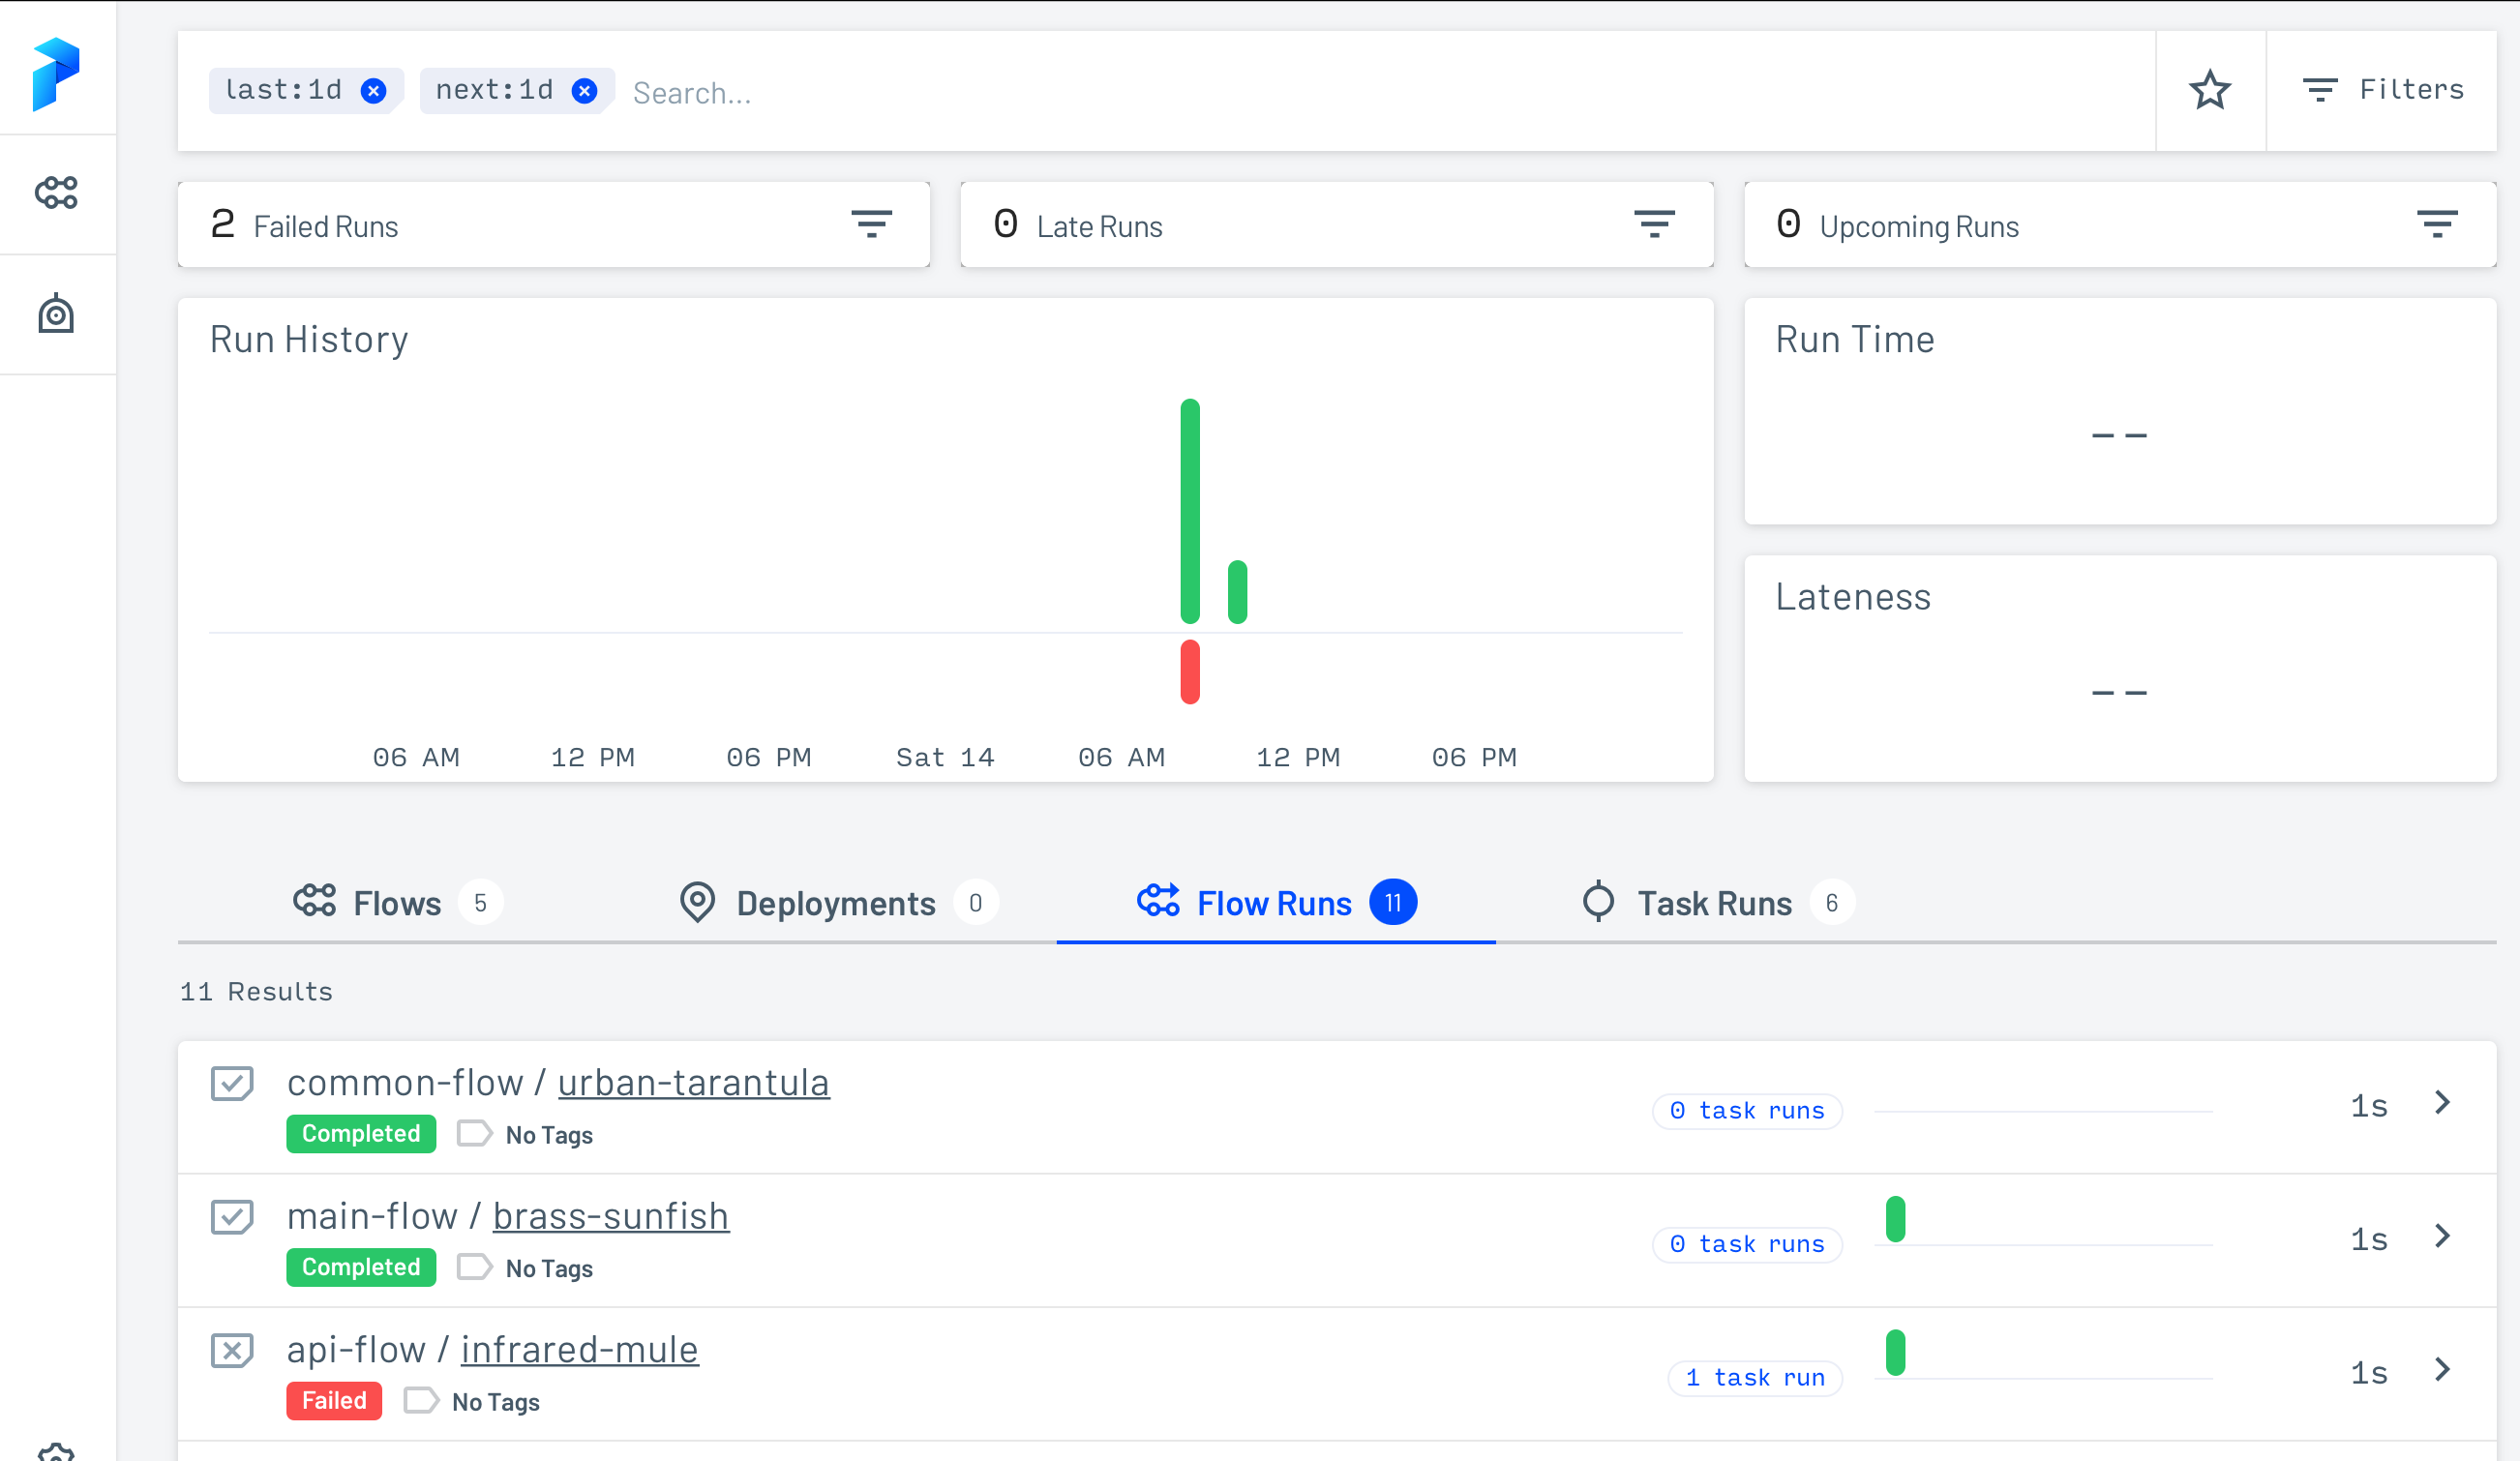